In [1]:
import numpy as np
import time
import pandas as pd
from typing import Union
import matplotlib.pyplot as plt
import math
from scipy.spatial import Delaunay

In [2]:
from ambientfisher.interpolators import PoissonAFInterpolator
from ambientfisher.interpolators import AmbientFisherInterpolator


In [3]:
def poisson_pdf(nu):
    def pdf(n_obs):
        logp = n_obs * np.log(nu) - nu - np.vectorize(math.lgamma)(n_obs + 1)
        return np.exp(logp)
    return pdf

def arbitrary_nu_parametrization(alpha):
    x1 = 1.0
    x2 = 1.0
    return alpha[0] * x1 + alpha[1] * x2

In [4]:
# xarray = np.linspace(1e-9, 15.0, num=10000)
xarray = np.arange(0, 15+1)

In [5]:
def plot_anchor_interp(
    alpha_target=np.array([0.05, -0.25]),
    alphas=np.array([[0.0, 0.0], [0.1, -0.5], [0.0, -0.3]]),
    compare_predictions_with_truth = False,
    plot_simplex = False
):
    
    anchor_alphas    = np.array(alphas)
    anchor_nus       = [arbitrary_nu_parametrization(alpha) for alpha in anchor_alphas]
    anchor_pdfs      = [poisson_pdf(nu) for nu in anchor_nus]

    nu_target = arbitrary_nu_parametrization(alpha_target)
    interp_closed = PoissonAFInterpolator(anchor_alphas, anchor_nus, plot_simplex = plot_simplex)

    if plot_simplex: return None

    interp_orig = AmbientFisherInterpolator(anchor_alphas, anchor_pdfs, xarray)
        
    nu_hat = interp_closed.predict(alpha_target)
    p_hat_closed = poisson_pdf(nu_hat)(xarray)
    
    p_hat_orig = interp_orig.predict_intrinsic(alpha_target)
    
    p_true = poisson_pdf(nu_target)(xarray)

    p0, p1, p2 = anchor_pdfs

    plt.figure(figsize=(7.2, 4.6))

    if not compare_predictions_with_truth:
        plt.plot(xarray, p0(xarray), c="black", label='anchor 1')
        plt.plot(xarray, p1(xarray), c="r", label='anchor 2')
        plt.plot(xarray, p2(xarray), c="g", label='anchor 3')
        plt.plot(xarray, p_hat_closed, c="b", ls="dashed", label='target pred')
        plt.plot(xarray, p_true, c="b", ls="dotted", label='target truth')

    else:
        plt.plot(xarray, p_hat_closed, label='Poisson Space AF Interpolation')
        plt.plot(xarray, p_hat_orig, label='Original AF Interpolation')
        plt.plot(xarray, p_true, c="b", ls="dotted", label='target truth')
        
    plt.xlabel(r"$f(x \mid \alpha)$", fontsize=16)
    plt.ylabel("density", fontsize=14)

    # plt.axis(xmin = 0.0, xmax = 20.0, ymin = 0.0, ymax = 0.9)

    plt.tight_layout()
    plt.legend()
    plt.show()

    return None

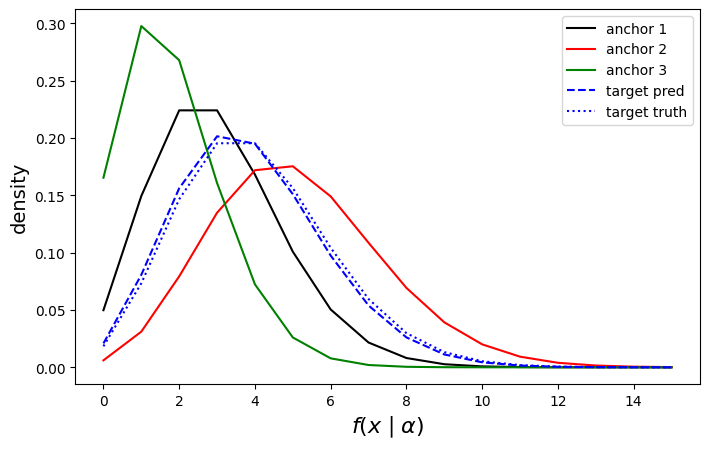

In [7]:
plot_anchor_interp(
    alpha_target=np.array([2.0, 2.0]),
    alphas=np.array([[1.0, 2.0], [2.6, 2.5], [1.5, 0.3]]),
)

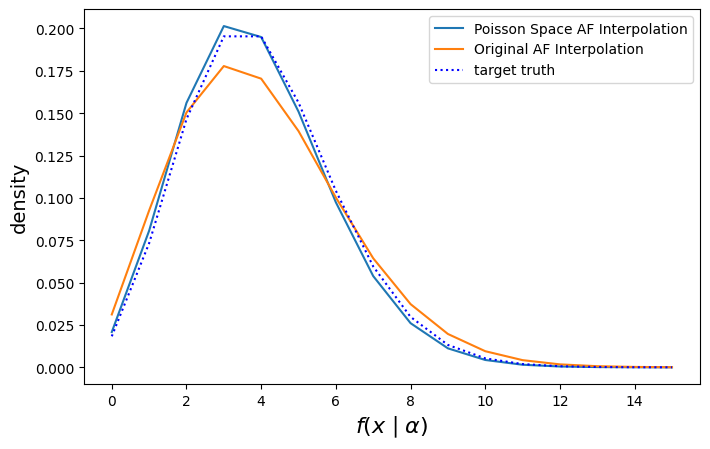

In [8]:
plot_anchor_interp(
    alpha_target=np.array([2.0, 2.0]),
    alphas=np.array([[1.0, 2.0], [2.6, 2.5], [1.5, 0.3]]),
    compare_predictions_with_truth=True
)

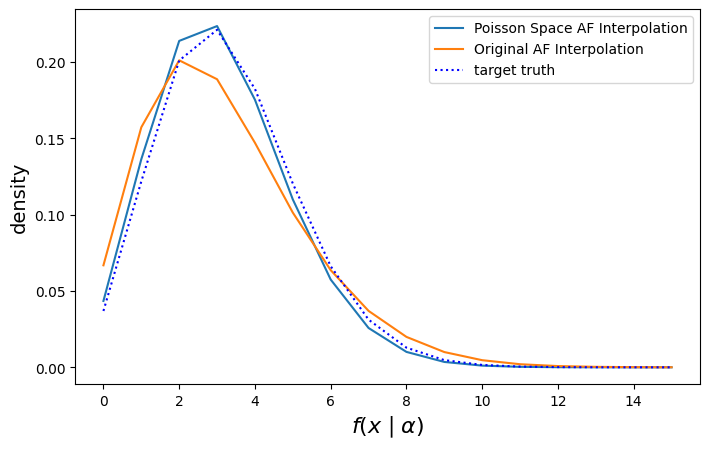

In [9]:
plot_anchor_interp(
    alpha_target=np.array([1.8, 1.5]),
    alphas=np.array([[1.0, 2.0], [2.6, 2.5], [1.5, 0.3]]),
    compare_predictions_with_truth=True
)